In [1]:
from keras.datasets import mnist

2023-06-19 17:27:14.154642: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-19 17:27:14.156443: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 17:27:14.184108: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 17:27:14.184805: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 17:27:14.791969: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


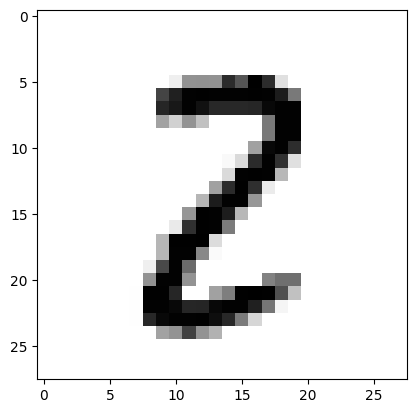

In [7]:
import matplotlib.pyplot as plt
digit = test_images[2138]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
test_labels[2138]

2

In [18]:
from keras import models
from keras import layers

In [19]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

In [20]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

In [22]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [23]:
from keras.utils import to_categorical

In [24]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)

In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(f"test accuracy: {test_acc}")

10000/10000 [==============================] - 1s 131us/step